# ¡Pregunta, pregunta, pregunta!

In [1]:
# Cálculos
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',999) # ayuda a ver más columnas del dataset
pd.set_option("max_rows", 100)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Video_Games_Sales.csv')

df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_filtro = df[df['Year_of_Release']==2015.0].copy()
df_filtro = df_filtro[df_filtro.Platform.isin(['PS4', 'XOne'])]
df_filtro.groupby('Name')['Global_Sales'].sum()

Name
Adventure Time: Finn & Jake Investigations    0.14
Arcania: Gothic 4                             0.05
Arslan: The Warriors of Legend                0.09
Assassin's Creed Chronicles: China            0.04
Assassin's Creed Syndicate                    4.69
                                              ... 
Wasteland 2                                   0.16
Wolfenstein: The Old Blood                    0.58
Yakuza Zero: The Place of Oath                0.17
Yoru no Nai Kuni                              0.08
Zombie Army Trilogy                           0.31
Name: Global_Sales, Length: 145, dtype: float64

In [ ]:
df_filtro = df[df['Year_of_Release']==2015.0].copy()
df_filtro = df_filtro[df_filtro.Platform.isin(['PS4', 'XOne'])]
df_filtro.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)

Name
Call of Duty: Black Ops 3                22.02
FIFA 16                                  11.82
Star Wars Battlefront (2015)             11.64
Fallout 4                                11.38
NBA 2K16                                  6.22
                                         ...  
Blade Arcus from Shining EX               0.02
Natsuiro High School: Seishun Hakusho     0.02
Professional Farmer 2016                  0.02
Chaos;Child                               0.01
Raven's Cry                               0.01
Name: Global_Sales, Length: 145, dtype: float64

In [ ]:
df_top = pd.DataFrame()
df_top['Sales'] = df_filtro.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)
df_top['Sales_perct'] = 100*df_top['Sales']/df_top['Sales'].sum()
df_top['Sales_perct_cum'] = df_top['Sales_perct'].cumsum()
df_top.head(10)

,Sales,Sales_perct,Sales_perct_cum
Name,,,
Call of Duty: Black Ops 3,22.02,12.298241,12.298241
FIFA 16,11.82,6.601508,18.899749
Star Wars Battlefront (2015),11.64,6.500977,25.400726
Fallout 4,11.38,6.355767,31.756493
NBA 2K16,6.22,3.473890,35.230383
Madden NFL 16,5.66,3.161128,38.391511
Batman: Arkham Knight,5.44,3.038257,41.429768
The Witcher 3: Wild Hunt,5.28,2.948897,44.378665
Assassin's Creed Syndicate,4.69,2.619380,46.998045


In [ ]:
df_top['top_juegos'] = np.where(df_top.Sales_perct_cum<50.0,1,0)

In [ ]:
df_top.groupby('top_juegos')['Sales'].sum()

top_juegos
0    90.28
1    88.77
Name: Sales, dtype: float64

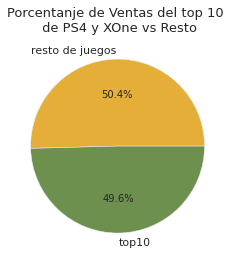

In [ ]:
fig, ax = plt.subplots(1,1)
# colores
colors = sns.color_palette()[2:4]
labels = ['resto de juegos', 'top10']

# grafica
ax.pie(df_top.groupby('top_juegos')['Sales'].sum(), labels = labels, colors = colors, autopct='%1.1f%%' )
plt.title('Porcentanje de Ventas del top 10 \n de PS4 y XOne vs Resto', fontsize=13)
plt.show()

In [ ]:
fig.savefig('filename.jpeg', dpi=1200)

Text(0.5, 1.0, 'Ventas del top 10 de PS4 y XOne')

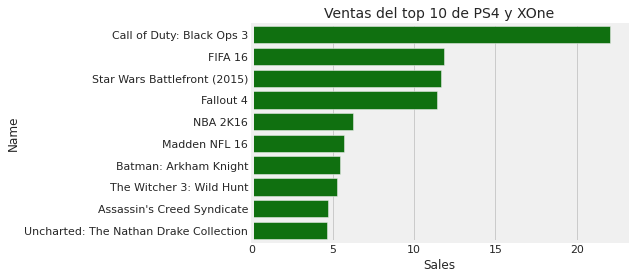

In [ ]:
bar_plot = sns.barplot(y = df_top[df_top['top_juegos']==1].index, x = 'Sales', data = df_top[df_top['top_juegos']==1], color = 'green', orient='h', )
plt.title('Ventas del top 10 de PS4 y XOne', fontsize=14)

In [ ]:
bar_plot.figure.savefig("output.png", dpi=600, bbox_inches='tight')

# Clase 6

In [ ]:
# Cálculos
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',999) # ayuda a ver más columnas del dataset
pd.set_option("max_rows", 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Video_Games_Sales.csv')

df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# Descubriendo tendencias

In [ ]:
df_top = pd.DataFrame()
df_top['Sales'] = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
df_top['Sales_perct'] = 100*df_top['Sales']/df_top['Sales'].sum()
df_top['Sales_perct_cum'] = df_top['Sales_perct'].cumsum()
df_top.head(10)

,Sales,Sales_perct,Sales_perct_cum
Genre,,,
Action,1745.27,19.570458,19.570458
Sports,1332.00,14.936285,34.506744
Shooter,1052.94,11.807066,46.313810
Role-Playing,934.40,10.477827,56.791637
Platform,828.08,9.285615,66.077252
Misc,803.18,9.006401,75.083652
Racing,728.90,8.173467,83.257119
Fighting,447.48,5.017784,88.274904
Simulation,390.42,4.377946,92.652850


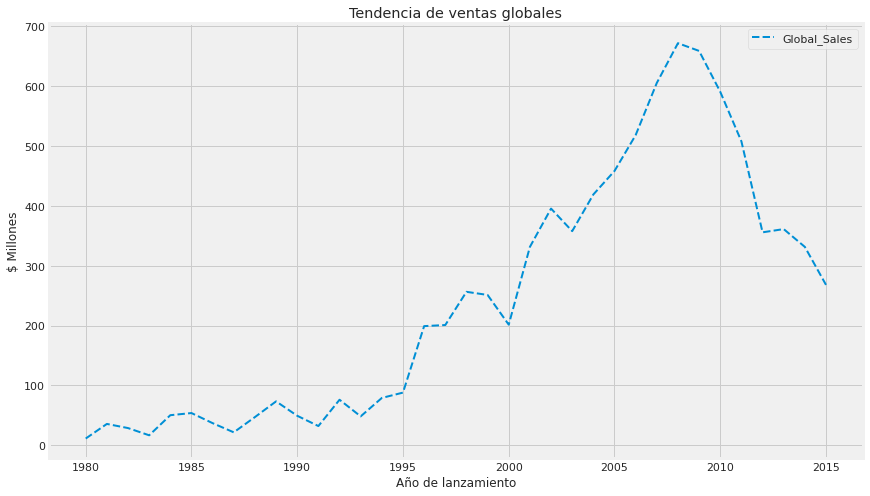

In [ ]:
plot1 = df[df['Year_of_Release']<=2015.0].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum().plot(
    x='Year_of_Release', y = 'Global_Sales', figsize=(13,8), 
            title="Tendencia de ventas globales", xlabel = 'Año de lanzamiento' , ylabel='$ Millones',
            style=['--'], linewidth=2.0
)

In [ ]:
fig = plot1.get_figure()
fig.savefig('M03C07.jpeg', dpi=1200, bbox_inches='tight')

In [ ]:
df_tendencias = df[['Year_of_Release', 'Genre', 'Global_Sales']].copy()
df_tendencias = df_tendencias[df_tendencias.Year_of_Release>=2000.0] 
df_tendencias = df_tendencias[df_tendencias.Year_of_Release<=2015.0]
df_tendencias = df_tendencias[df_tendencias.Genre.isin(['Action','Sports', 'Shooter', 'Role-Playing','Platform' ])]
df_tendencias.head()

,Year_of_Release,Genre,Global_Sales
0,2006.0,Sports,82.53
3,2009.0,Sports,32.77
6,2006.0,Platform,29.80
8,2009.0,Platform,28.32
13,2007.0,Sports,22.70


In [ ]:
df_plot = df_tendencias.reset_index().groupby(['Year_of_Release', 'Genre'], as_index=False)['Global_Sales'].sum()

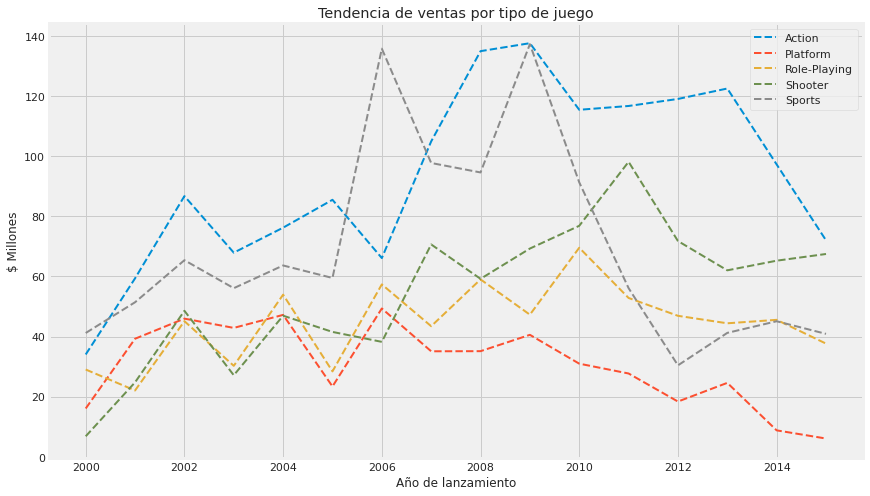

In [ ]:
fig, ax = plt.subplots()

for key, data in df_plot.groupby('Genre'):
  data.plot(x='Year_of_Release', y='Global_Sales', ax=ax, label=key, figsize=(13,8), 
            title="Tendencia de ventas por tipo de juego", xlabel = 'Año de lanzamiento' , ylabel='$ Millones',
            style=['--'], linewidth=2.0)

In [ ]:
fig.savefig('M03C07_img2.jpeg', dpi=1200, bbox_inches='tight')

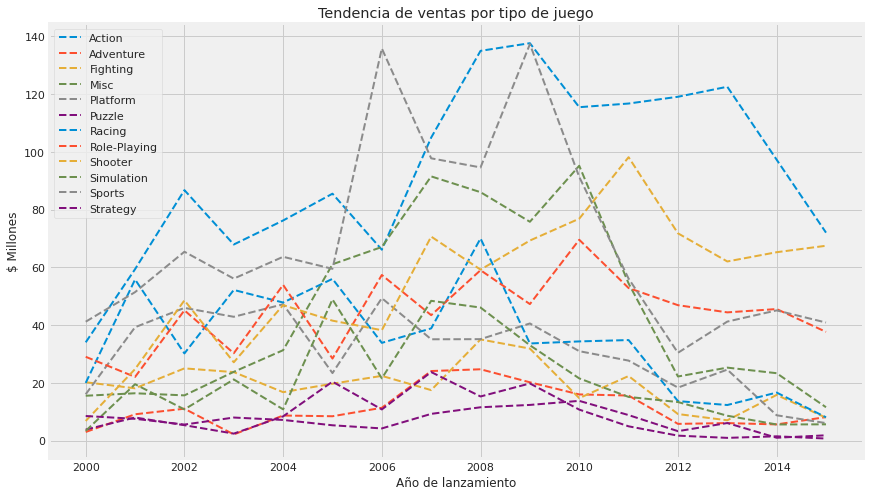

In [ ]:
df_tendencias = df[['Year_of_Release', 'Genre', 'Global_Sales']].copy()
df_tendencias = df_tendencias[df_tendencias.Year_of_Release>=2000.0] 
df_tendencias = df_tendencias[df_tendencias.Year_of_Release<=2015.0]

df_plot = df_tendencias.reset_index().groupby(['Year_of_Release', 'Genre'], as_index=False)['Global_Sales'].sum()
fig, ax = plt.subplots()

for key, data in df_plot.groupby('Genre'):
  data.plot(x='Year_of_Release', y='Global_Sales', ax=ax, label=key, figsize=(13,8), 
            title="Tendencia de ventas por tipo de juego", xlabel = 'Año de lanzamiento' , ylabel='$ Millones',
            style=['--'], linewidth=2.0)

In [ ]:
fig.savefig('M03C07_img3.jpeg', dpi=1200, bbox_inches='tight')

# Conjuntando y comparando

In [ ]:
df_filtro = df[df.Year_of_Release.isin([2015.,2014.,2013.])].copy()
df_filtro.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M


In [ ]:
df_bars = pd.DataFrame()
for year in list(df_filtro.Year_of_Release.unique()):  
  df_year = df_filtro[df_filtro['Year_of_Release']==year]
  df_year = df_year.groupby('Genre', as_index=False)['Global_Sales'].sum().sort_values(by='Global_Sales',ascending=False)
  df_year['Sales_perct'] = 100*df_year['Global_Sales']/df_year['Global_Sales'].sum()
  df_year['year']=year
  if df_bars is None:
    df_bars = df_year
  df_bars = pd.concat([df_bars, df_year], axis=0)

df_bars.head(2)
#df_year['Sales_perct_cum'] = df_year['Sales_perct'].cumsum()

,Genre,Global_Sales,Sales_perct,year
0,Action,122.57,33.930351,2013.0
8,Shooter,62.05,17.176946,2013.0


In [ ]:
df_plot = df_bars.pivot(index='year', columns='Genre', values='Sales_perct')

Text(0.5, 1.0, 'Porcentaje de ventas por género de juego en cada año')

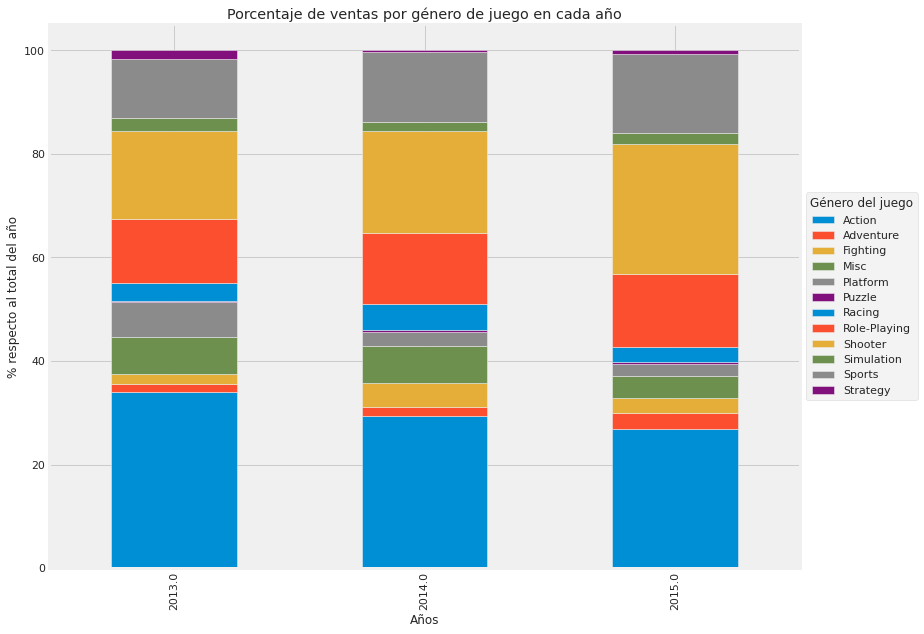

In [ ]:
bar = df_plot.plot(kind='bar', stacked=True, figsize=(12,10))

# labels para x & y
plt.xlabel('Años', )
plt.ylabel('% respecto al total del año')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# titulo del plot
plt.title('Porcentaje de ventas por género de juego en cada año')

In [ ]:
bar.figure.savefig("M03C09_img1.png", dpi=600, bbox_inches='tight')

In [ ]:
df_plot = df_bars.pivot(index='year', columns='Genre', values='Global_Sales')

Text(0.5, 1.0, 'Total $ de ventas por8 género de juego en cada año')

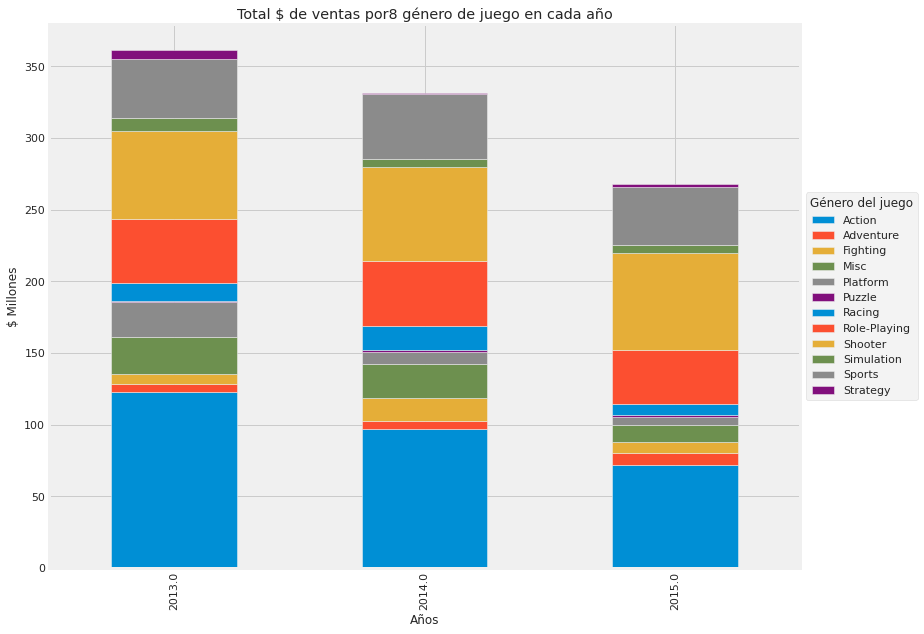

In [ ]:
bar2 = df_plot.plot(kind='bar', stacked=True, figsize=(12,10))

# labels para x & y
plt.xlabel('Años', )
plt.ylabel('$ Millones')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# titulo del plot
plt.title('Total $ de ventas por8 género de juego en cada año')

In [ ]:
bar2.figure.savefig("M03C09_img2.png", dpi=600, bbox_inches='tight')

# Distribuyendo las barras

Text(0.5, 1.0, 'Porcentaje de ventas por género de juego en cada año')

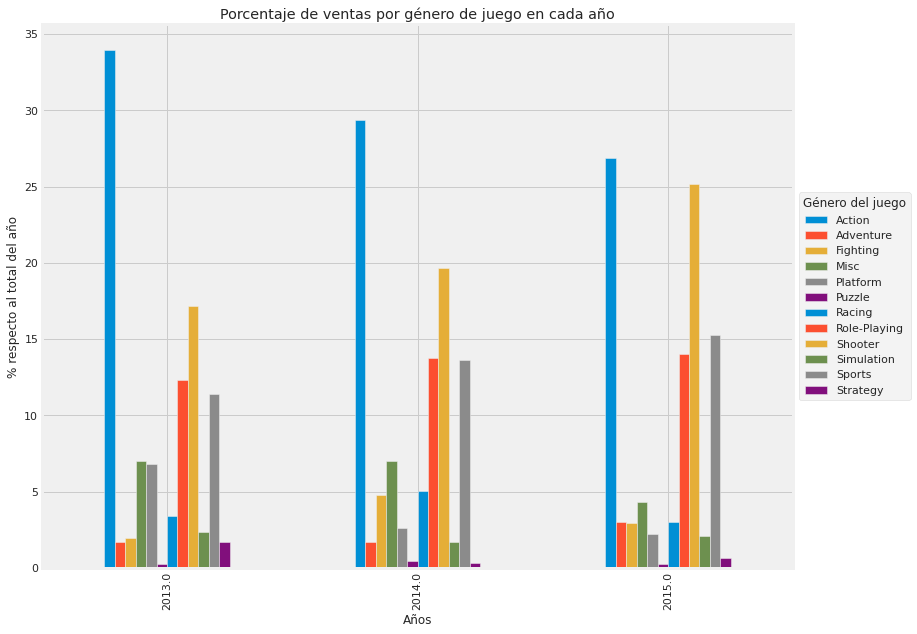

In [ ]:
df_plot = df_bars.pivot(index='year', columns='Genre', values='Sales_perct')

bar = df_plot.plot(kind='bar', figsize=(12,10))

# labels for x & y axis
plt.xlabel('Años', )
plt.ylabel('% respecto al total del año')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# title of plot
plt.title('Porcentaje de ventas por género de juego en cada año')

In [ ]:
bar.figure.savefig("M03C09_img3.png", dpi=600, bbox_inches='tight')

Text(0.5, 1.0, 'Total $ de ventas por8 género de juego en cada año')

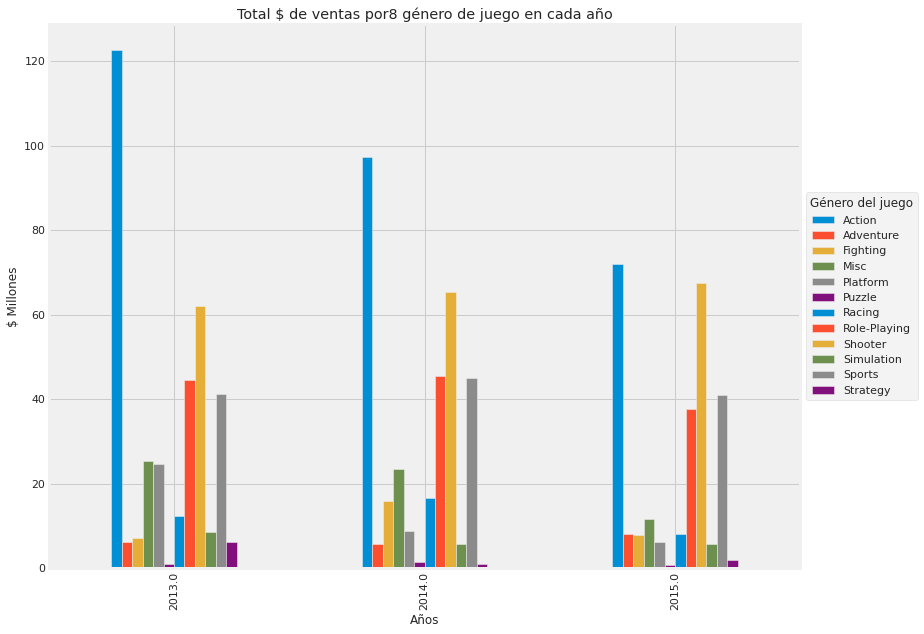

In [ ]:
df_plot = df_bars.pivot(index='year', columns='Genre', values='Global_Sales')

bar2 = df_plot.plot(kind='bar', figsize=(12,10))

# labels para x & y
plt.xlabel('Años', )
plt.ylabel('$ Millones')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Género del juego")

# titulo del plot
plt.title('Total $ de ventas por8 género de juego en cada año')

In [ ]:
bar2.figure.savefig("M03C09_img4.png", dpi=600, bbox_inches='tight')

# Reposteria de Pies

In [15]:
df_filtro = df[df.Year_of_Release.isin([2015.,2014.,2013., 2012., 2011. ])].copy()
df_filtro = df_filtro[df_filtro.Genre.isin(['Sports', 'Shooter', 'Fighting'])]

In [16]:
df_sports = df_filtro[df_filtro['Genre']=='Sports']
df_sports.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.30,0.11,1.39,6.65,NaN,NaN,NaN,NaN,NaN,NaN


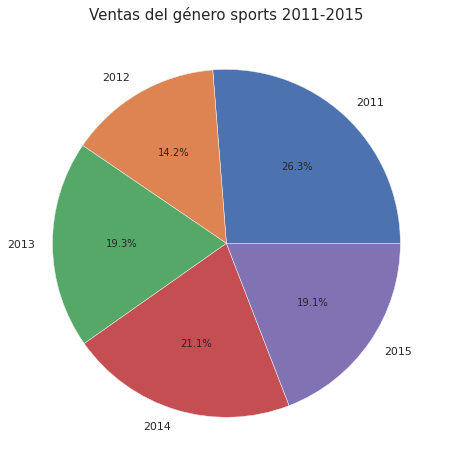

In [26]:
values = df_sports.groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales']

fig, ax = plt.subplots(1,1, figsize=(10,8))
# colores
colors = sns.color_palette("deep")[0:5]
labels = [2011, 2012, 2013, 2014, 2015]

# grafica
ax.pie(values, labels = labels, colors = colors, autopct='%1.1f%%' )
plt.title('Ventas del género sports 2011-2015', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Ventas de Fighting 2011-2015')

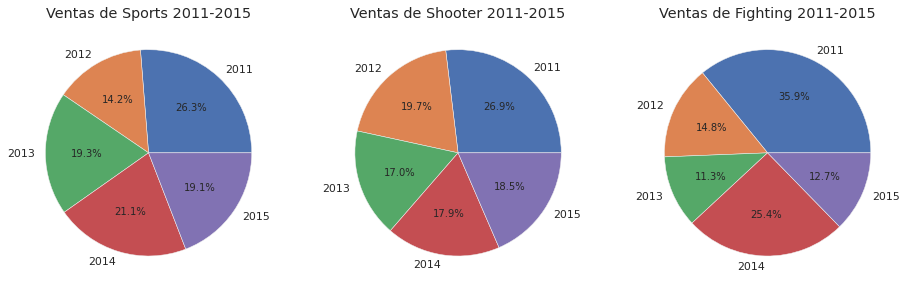

In [41]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(14,12))

ax1.pie(df_filtro[df_filtro['Genre']=='Sports'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax1.set_title('Ventas de Sports 2011-2015')

ax2.pie(df_filtro[df_filtro['Genre']=='Shooter'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Ventas de Shooter 2011-2015')

ax3.pie(df_filtro[df_filtro['Genre']=='Fighting'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie
ax3.set_title('Ventas de Fighting 2011-2015')


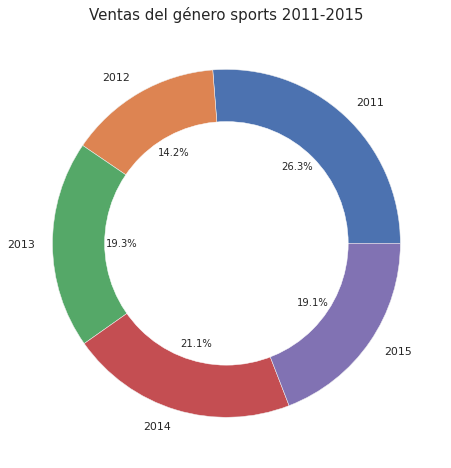

In [42]:
values = df_sports.groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales']

fig, ax = plt.subplots(1,1, figsize=(10,8))
# colores
colors = sns.color_palette("deep")[0:5]
labels = [2011, 2012, 2013, 2014, 2015]

# grafica
ax.pie(values, labels = labels, colors = colors, autopct='%1.1f%%' )
plt.title('Ventas del género sports 2011-2015', fontsize=15)

circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()


Text(0.5, 1.0, 'Ventas de Fighting 2011-2015')

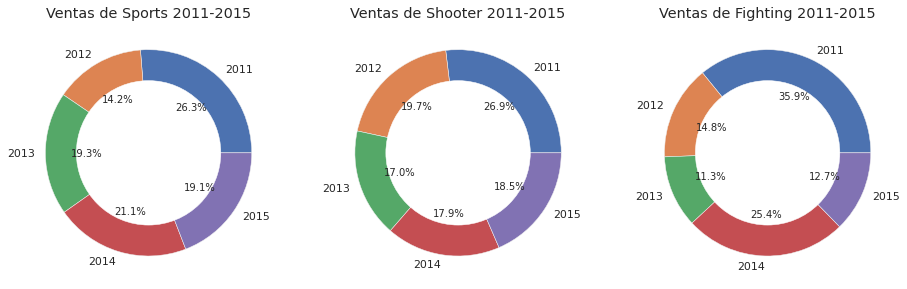

In [47]:
circle = plt.Circle( (0,0), 0.7, color='white')
circle2 = plt.Circle( (0,0), 0.7, color='white')
circle3 = plt.Circle( (0,0), 0.7, color='white')

fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(14,12))

ax1.pie(df_filtro[df_filtro['Genre']=='Sports'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax1.add_artist(circle)
ax1.set_title('Ventas de Sports 2011-2015')

ax2.pie(df_filtro[df_filtro['Genre']=='Shooter'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax2.add_artist(circle2)
ax2.set_title('Ventas de Shooter 2011-2015')

ax3.pie(df_filtro[df_filtro['Genre']=='Fighting'].groupby('Year_of_Release', as_index=False)['Global_Sales'].sum()['Global_Sales'],
        labels = labels,colors = colors,autopct = '%1.1f%%')
ax3.add_artist(circle3)
ax3.set_title('Ventas de Fighting 2011-2015')


# Clase 11

In [32]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sale_house.csv')

df.head(10)

FileNotFoundError: ignored

# Radiografía de datos

In [6]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')*10

Text(0.5, 1.0, 'Histograma del score de los jugadores')

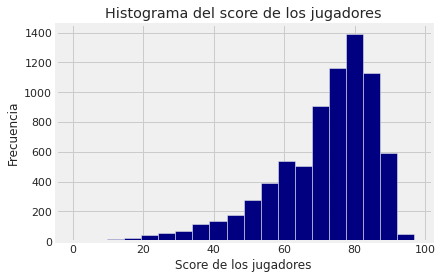

In [15]:
# histogramas

sns.histplot(data = df
            ,x = 'User_Score'
            ,color = 'navy'
            ,alpha = 1
            ,bins = 20
            )

plt.xlabel('Score de los jugadores')
plt.ylabel('Frecuencia')

# titulo del plot
plt.title('Histograma del score de los jugadores')

Text(0.5, 1.0, 'Histograma del score de los críticos')

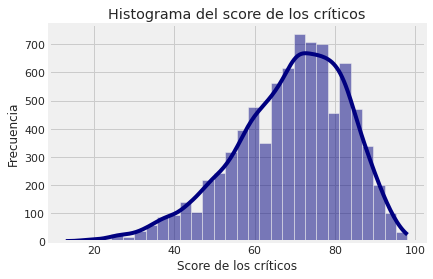

In [16]:
sns.histplot(data = df
            ,x = 'Critic_Score'
            ,color = 'navy'
            ,alpha = 0.5
            ,bins = 30
            ,kde = True
            )

plt.xlabel('Score de los críticos')
plt.ylabel('Frecuencia')

# titulo del plot
plt.title('Histograma del score de los críticos')

Text(0.5, 1.0, 'Boxplot del score de los jugadores')

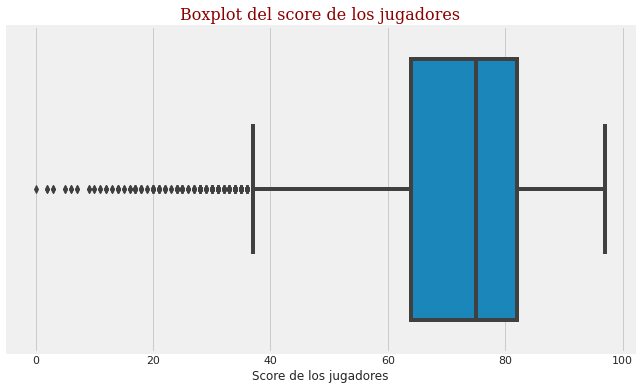

In [21]:
# box plot

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt_1 = plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df["User_Score"])

plt.xlabel('Score de los jugadores')

# titulo del plot
plt.title('Boxplot del score de los jugadores', fontdict=font)

Text(0.5, 1.0, 'Boxplot del score de los jugadores')

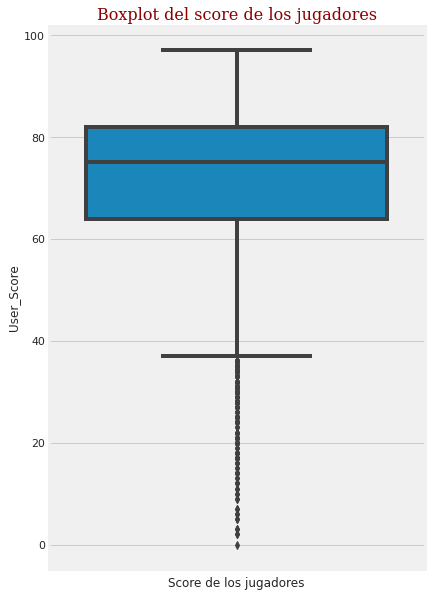

In [23]:
plt_1 = plt.figure(figsize=(6, 10))
ax = sns.boxplot(y=df["User_Score"])

plt.xlabel('Score de los jugadores')

# titulo del plot
plt.title('Boxplot del score de los jugadores', fontdict=font)

# Comparaciones con cajas y campanas

In [33]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')*10

KeyError: ignored

In [34]:
df_box = df[['Critic_Score', 'User_Score', ]]
# boxes en un mismo plot
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.boxplot(x="variable", y="value", data=pd.melt(df_box))
ax.set_xlabel("Scores", fontsize = 20)
ax.set_ylabel("Porcentaje", fontsize = 20)
ax.set_title("Comparativa de Scores", fontsize = 20)

plt.legend() 
plt.show()

KeyError: ignored

In [ ]:
fig.savefig("M04C13_img1.png", dpi=600, bbox_inches='tight')

In [ ]:
# histogramas mismo plot
fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.set(style="darkgrid")

sns.histplot(data=df, x="Critic_Score", color="skyblue", label="Score de la critica", kde=True, stat='percent')
sns.histplot(data=df, x="User_Score",  label="Score de los usuarios", kde=True, stat='percent')
ax.set_xlabel("Puntaje", fontsize = 20)
ax.set_ylabel("Porcentaje", fontsize = 20)
ax.set_title("Comparativa de Scores", fontsize = 20)

plt.legend() 
plt.show()

In [ ]:
fig.savefig("M04C13_img2.png", dpi=600, bbox_inches='tight')

# Relaciones de pareja

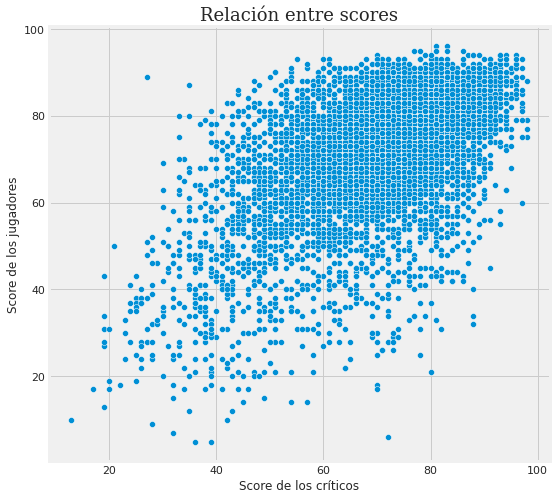

In [29]:
font = {'family': 'serif',
        'weight': 'normal',
        'size': 18,
        }

plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="Critic_Score", y="User_Score")

plt.ylabel('Score de los jugadores')
plt.xlabel('Score de los críticos')

# titulo del plot
plt.title('Relación entre scores', fontdict=font)

plt.show()

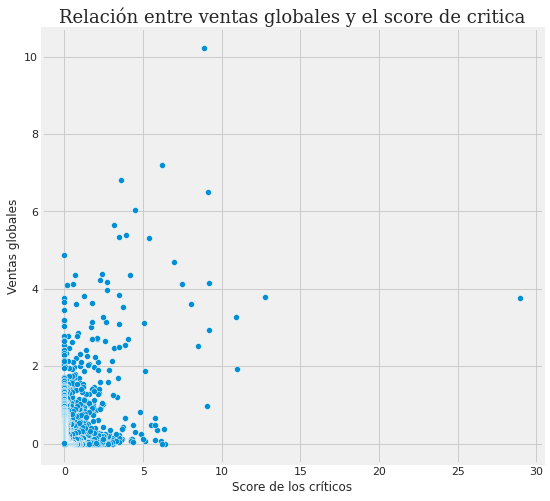

In [33]:
plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="EU_Sales", y="JP_Sales")

plt.ylabel('Ventas EU')
plt.xlabel('Ventas JP')

# titulo del plot
plt.title('Relación entre ventas de EU y JP', fontdict=font)

plt.show()

# Relaciones de amigos

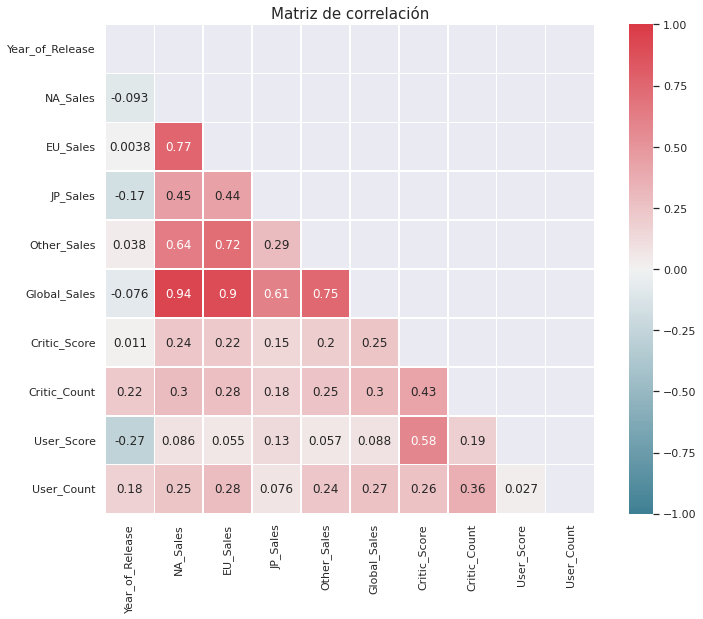

In [83]:
d= df
corr = d.corr()

# mascara de ceros
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Inicializa gráfica
f, ax = plt.subplots(figsize=(11, 9))

# mapa de colores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# mapa de calor de la matriz
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Matriz de correlación', fontdict={'fontsize':15})
plt.show()

In [84]:
f.savefig("M04C15.png", dpi=600, bbox_inches='tight')

# Jugando con burbujas

In [ ]:
df_agr = df[df['Genre']=='Shooter'].copy()

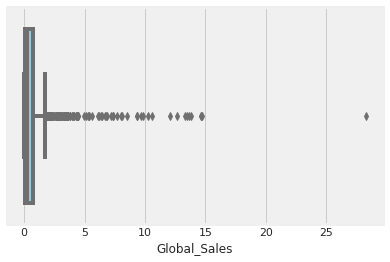

In [47]:
sns.boxplot(data=df_agr, x="Global_Sales", color="skyblue")

In [49]:
df_plot = df_agr.groupby(['Critic_Score','User_Score'], as_index=False)['Global_Sales'].mean()

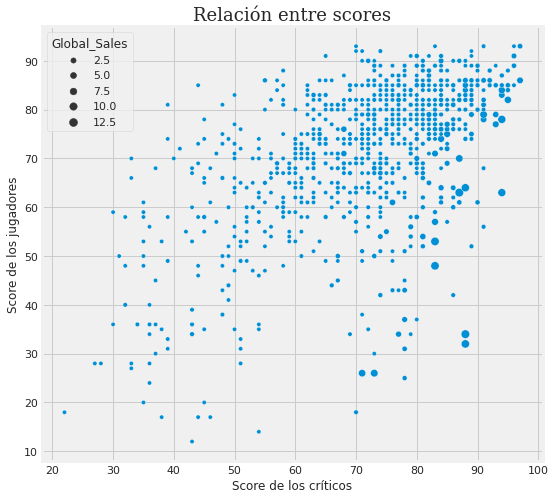

In [50]:
plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df_plot, x="Critic_Score", y="User_Score", size='Global_Sales')

plt.ylabel('Score de los jugadores')
plt.xlabel('Score de los críticos')

# titulo del plot
plt.title('Relación entre scores y las ventas', fontdict=font)

plt.show()

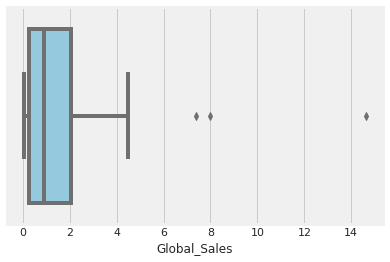

In [53]:
df_agr = df[df['Year_of_Release']==2015.0].copy()
df_agr = df_agr[df_agr['Genre']=='Shooter']
sns.boxplot(data=df_agr, x="Global_Sales", color="skyblue")

In [54]:
df_plot = df_agr.groupby(['Critic_Score','User_Score'], as_index=False)['Global_Sales'].sum()


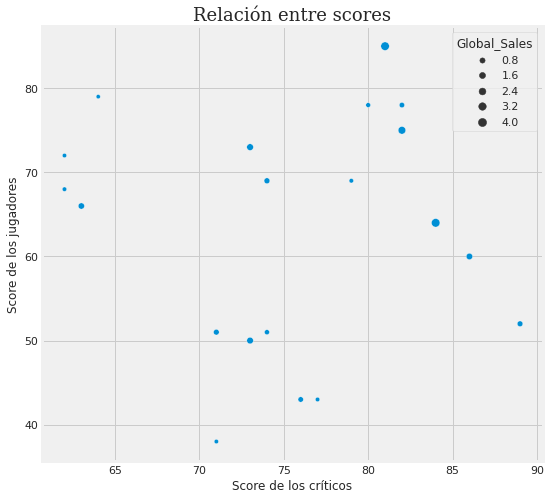

In [55]:
plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df_plot, x="Critic_Score", y="User_Score", size='Global_Sales')

plt.ylabel('Score de los jugadores')
plt.xlabel('Score de los críticos')

# titulo del plot
plt.title('Relación entre scores', fontdict=font)

plt.show()

# Clase 17

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Real estate.csv')

df.head(4)

,transaction date,house age,distance to the nearest MRT station,GarageArea,number of convenience stores,latitude,longitude,Neighborhood,GarageType,house price of unit area
0,2012.917,32.0,84.87882,548,10,24.98298,121.54024,CollgCr,Attchd,37.9
1,2012.917,19.5,306.59470,460,9,24.98034,121.53951,Veenker,Attchd,42.2
2,2013.583,13.3,561.98450,608,5,24.98746,121.54391,CollgCr,Attchd,47.3
3,2013.500,13.3,561.98450,642,5,24.98746,121.54391,Crawfor,Detchd,54.8


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   GarageArea                           414 non-null    int64  
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   Neighborhood                         414 non-null    object 
 8   GarageType                           390 non-null    object 
 9   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 32.5+ KB


# Encontrando patrones con mezclas

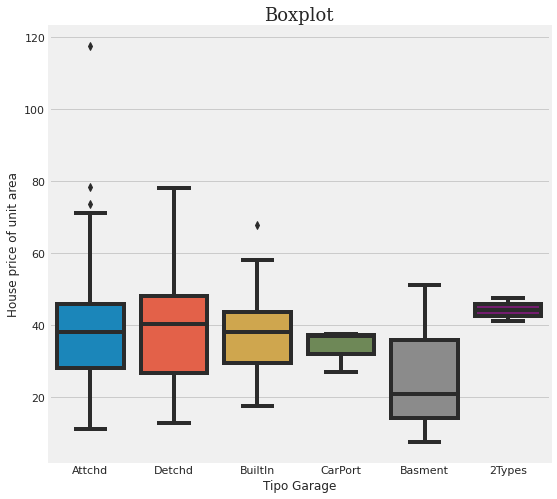

In [61]:
plt_1 = plt.figure(figsize=(8, 8))

ax = sns.boxplot(x="GarageType", y="house price of unit area", data=df)
plt.ylabel('House price of unit area')
plt.xlabel('Tipo Garage')

# titulo del plot
plt.title('Boxplot', fontdict=font)

plt.show()

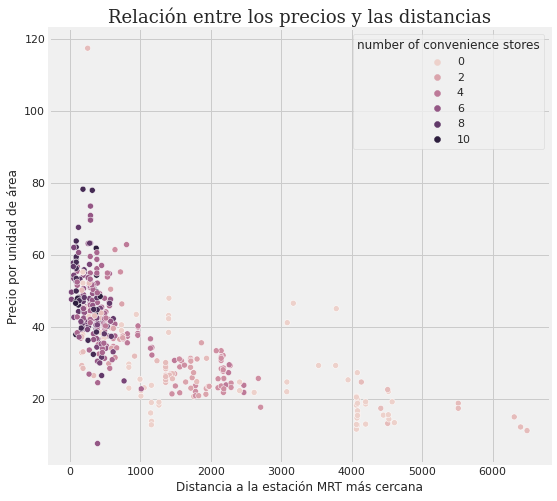

In [65]:
plt_1 = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(data=df, x="distance to the nearest MRT station", y="house price of unit area", hue="number of convenience stores")

plt.ylabel('Precio por unidad de área')
plt.xlabel('Distancia a la estación MRT más cercana')

# titulo del plot
plt.title('Relación entre los precios y las distancias', fontdict=font)

plt.show()

# Multiplicando gráficos de barras

In [67]:
print(df.columns)
df.info()

Index(['transaction date', 'house age', 'distance to the nearest MRT station',
       'GarageArea', 'number of convenience stores', 'latitude', 'longitude',
       'Neighborhood', 'GarageType', 'house price of unit area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   GarageArea                           414 non-null    int64  
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   Neighborhood                         414 non-null  

In [70]:
categorical = ['number of convenience stores', 'Neighborhood', 'GarageType']
f = pd.melt(df, value_vars=categorical)
f

,variable,value
0,number of convenience stores,10
1,number of convenience stores,9
2,number of convenience stores,5
3,number of convenience stores,5
4,number of convenience stores,5
...,...,...
1237,GarageType,Attchd
1238,GarageType,Attchd
1239,GarageType,Attchd
1240,GarageType,Attchd


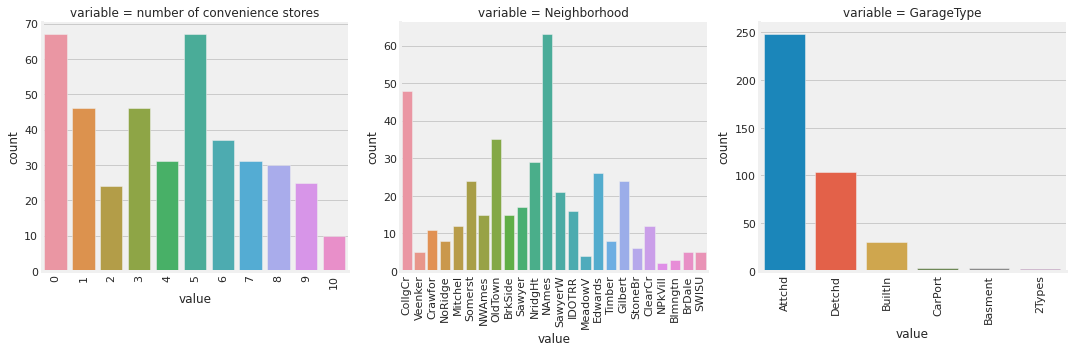

In [71]:
def countplot(x, **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df, value_vars=categorical)
g = sns.FacetGrid(f, col='variable',  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(countplot, 'value')

# Multiplicando scatter plots

In [72]:
df.columns

Index(['transaction date', 'house age', 'distance to the nearest MRT station',
       'GarageArea', 'number of convenience stores', 'latitude', 'longitude',
       'Neighborhood', 'GarageType', 'house price of unit area'],
      dtype='object')

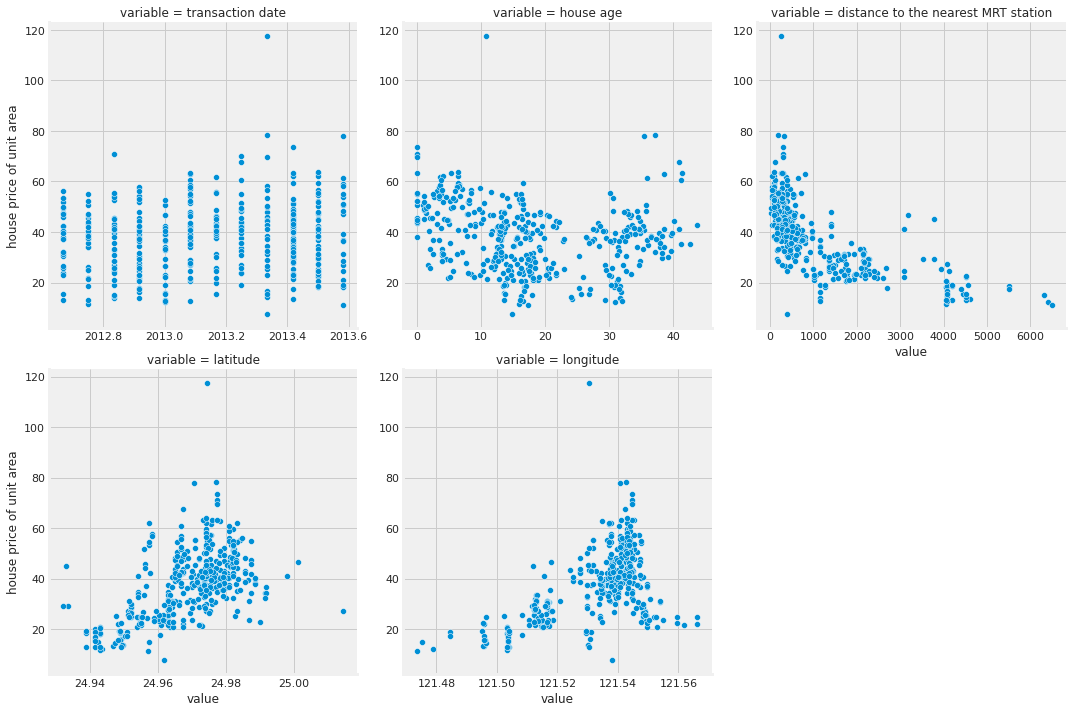

In [74]:
target = 'house price of unit area'
quantitative = ['transaction date', 'house age', 'distance to the nearest MRT station', 'latitude', 'longitude','house price of unit area']
f = pd.melt(df, id_vars=[target], value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.scatterplot, "value", target)

# Mapas geográficos

In [15]:
!pip install folium

In [16]:
# ploteo del mapa
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [17]:
city= folium.Map(location=[24.98, 121.52], tiles='Stamen Toner', zoom_start=12)
city

In [18]:
for i in range(0,len(df)):
    lat=df["latitude"][i]
    long=df["longitude"][i]
    folium.Marker([lat, long], ).add_to(city)

In [19]:
city

# Relación de fuerzas en palabras


In [4]:
!pip install wordcloud

In [5]:
from wordcloud import WordCloud

In [8]:
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/android-games.csv')
df2.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [ ]:
df2.category.unique()

In [10]:
text = " ".join(cat.split()[1] for cat in df2.category)
text

'ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE

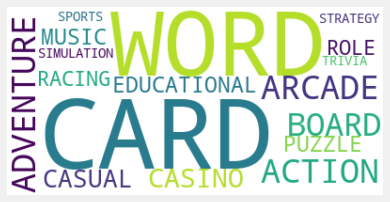

In [12]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Telarañas y Lollipops

In [1]:
# Librerias
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [12]:
# Data generada
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [7, 31, 33, 14],
'var2': [28, 15, 32, 14],
'var3': [8, 39, 23, 24],
'var4': [38, 1.5, 30, 4],
'var5': [29, 10, 9, 34]
})

df.head(3)

,group,var1,var2,var3,var4,var5
0,A,7,28,8,38.0,29
1,B,31,15,39,1.5,10
2,C,33,32,23,30.0,9


In [13]:
# tomammos las variables o columnas que queremos graficar
categorias = list(df.columns)[1:]
print(categorias)
N = len(categorias)

['var1', 'var2', 'var3', 'var4', 'var5']


In [14]:
# graficamos la primer linea de los datos
# el ultimo valor se debe repetir para cerrar la grafica
values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

[7, 28, 8, 38.0, 29, 7]

In [17]:
# necesitamos el angulo de cada eje en la gráfica - dividimos entre el numero de variables
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

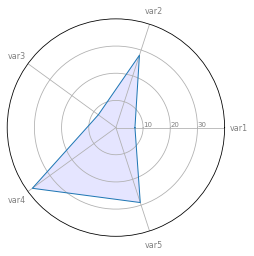

In [18]:
# nuestra garafica se inicia 
ax = plt.subplot(111, polar=True)

# dibujamos los ejes por variable + las etiquetas
plt.xticks(angles[:-1], categorias, color='grey', size=8)

# dibujamos el eje y
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

# Colocamos la data en la grafica
ax.plot(angles, values, linewidth=1, linestyle='solid')

# llenamos el area
ax.fill(angles, values, 'b', alpha=0.1)

plt.show()

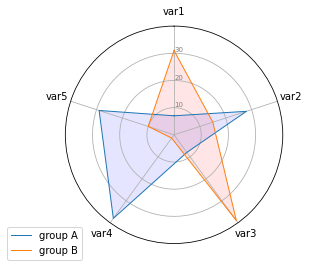

In [19]:
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categorias)

# dibujamos el eje y
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

# Colocamos la data en la grafica
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)

values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


plt.show()

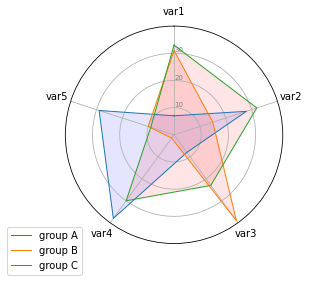

In [21]:
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categorias)

# dibujamos el eje y
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

# Colocamos la data en la grafica
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)

values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


plt.show()

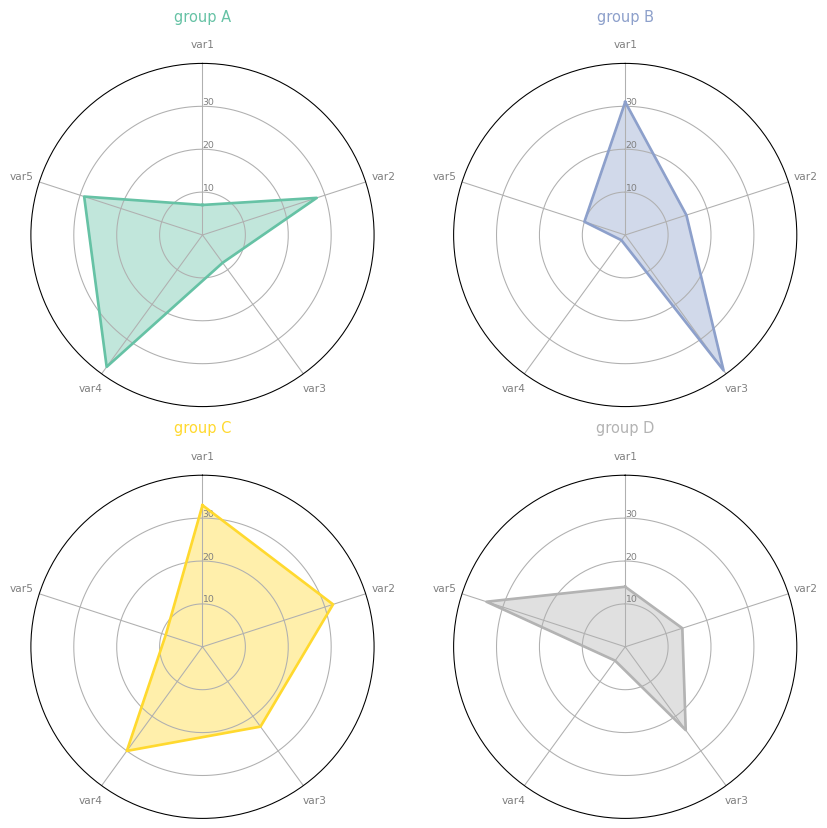

In [22]:
def make_spider( row, title, color):
    categories=list(df)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(2,2,row+1, polar=True, )

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=11, color=color, y=1.1)

    
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

In [24]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
df.head(10)

,group,values
0,A,0.882569
1,B,0.351115
2,C,0.999732
3,D,0.051363
4,E,0.881089
5,F,0.255220
6,G,0.447373
7,H,0.605917
8,I,0.398336
9,J,0.182642


In [25]:
df_ordered = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)

([<matplotlib.axis.XTick at 0x7f5ce3627650>,
 [Text(0, 0, 'D'),
  Text(0, 0, 'N'),
  Text(0, 0, 'J'),
  Text(0, 0, 'F'),
  Text(0, 0, 'T'),
  Text(0, 0, 'B'),
  Text(0, 0, 'I'),
  Text(0, 0, 'G'),
  Text(0, 0, 'P'),
  Text(0, 0, 'M'),
  Text(0, 0, 'R'),
  Text(0, 0, 'Q'),
  Text(0, 0, 'H'),
  Text(0, 0, 'L'),
  Text(0, 0, 'S'),
  Text(0, 0, 'O'),
  Text(0, 0, 'K'),
  Text(0, 0, 'E'),
  Text(0, 0, 'A'),
  Text(0, 0, 'C')])

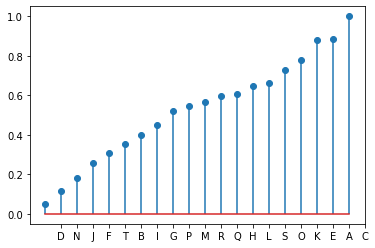

In [30]:
plt.stem(df_ordered['values'], use_line_collection=True)
plt.xticks( my_range, df_ordered['group'])

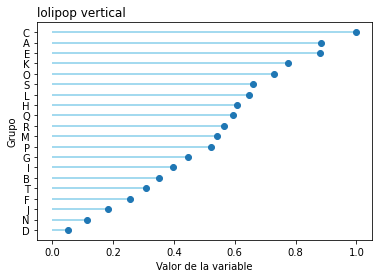

In [31]:
plt.hlines(y=my_range, xmin=0, xmax=df_ordered['values'], color='skyblue')
plt.plot(df_ordered['values'], my_range, "o")

plt.yticks(my_range, df_ordered['group'])
plt.title("lolipop vertical", loc='left')
plt.xlabel('Valor de la variable')
plt.ylabel('Grupo')

plt.show()